#### **GAN Architecture** 
- x Real data - z Random noise
- Enc encoder of autoencoder - Dec decoder of autoencoder
- G Denerator - D Discriminator


#### GAN Loss Function
The Generative Adversarial Network (GAN) loss function is defined as:

$\min_G \max_D V(G,D) = \mathbb{E}_{x \sim p_{\text{data}}(x)}[\log(D(x))] + \mathbb{E}_{z \sim p(z)}[\log(1-D(G(z)))] $

**Discriminator** classifies real data and fake data. **The Loss function** penalizes for any mistake in misclassfication of real from fakeupdates via backpropagation from discriminator loss. **Random noise** will be converted to realistic samples(fake), discriminator classifies the fake samples, the generator penalizes for any mistake in misclassfication, updates via backpropagation from generator loss and discriminator loss

**The Generator Loss** can be expressed as: $L_G = \mathbb{E}_{z \sim p(z)}[\log(1-D(G(z)))]$

Alternatively, it is often expressed as: $L_G = -\mathbb{E}_{z \sim p(z)}[\log(D(G(z)))]$


#### Training GANs

Convergence of GAN training remains an open problem with no reliable metrics

_______________


#### **Synthetic data using GANs**

- Pre-train Autoencoder:
$[\frac{1}{m} \sum_{i} \left( x_i \log x_i' + (1-x_i) \log (1-x_i') \right)]$
- Update Generator parameters $\theta_g$, $dec$:

  $[\theta_g, dec \leftarrow \theta_g, dec + \alpha \cdot \text{derivative}_{\theta_g, dec} \cdot \frac{1}{m} S \left( \log D(x_z) \right)]$
where $\alpha$ is the learning rate.
- Update Discriminator parameters:

  $[\theta_d \leftarrow \theta_d + \alpha \cdot \text{derivative}_{\theta_d} \cdot \frac{1}{m} S \left( \log D(x_{real}) + \log (1 - D(x_{fake})) \right)$

  Where $x_{real}$ is the real data and $x_{fake}$ is the generated data from the generator. In this case, $x_{fake} = x_{z}$.
Therefore,
  $[\theta_d \leftarrow \theta_d + \alpha \cdot \text{derivative}_{\theta_d} \cdot \frac{1}{m} S \left( \log D(x_{zi}) + \log (1 - D(x_{zi})) \right)]$
- Evaluation: Dimension-wise prediction


_________________________


#### **Variational Autoencoders**

Variational Autoencoders (VAEs) is at the intersection of Deep Learning (DL) and Probabilistic Graphical Models. They find applications in diverse fields such as Medical Imaging and Molecule generation.

The core idea is to encode an input as a distribution, sample a point from this encoding distribution, and then decode from the sampled point to generate a realistic output. This process can be summarized as:

- Input $\mathbf{x}$ $\rightarrow$ Latent space/code $\rightarrow$ Output $\mathbf{x}'$
- $\text{Enc}(\mathbf{x}) \rightarrow {N}(\boldsymbol{\mu}(\mathbf{x}), \boldsymbol{\Sigma}(\mathbf{x})) \text{ sampling } \rightarrow \mathbf{x}'$

The objective is to minimize the reconstruction error. Common loss functions include:

- item Gaussian Input: ${L}(\mathbf{x}, \mathbf{r}) = ||\mathbf{x} - \mathbf{r}||^2$
- Binary Input: ${L}(\mathbf{x}, \mathbf{r}) = -\sum_i [\mathbf{x}_i \log(\mathbf{r}_i) + (1 - \mathbf{x}_i) \log(1 - \mathbf{r}_i)]$



A Detailed flow process can be visualized as follows:

-  $[\mathbf{x} \xrightarrow{\text{Enc}(\mathbf{x})= q_\theta(\mathbf{z}|\mathbf{x})} {N}(\boldsymbol{\mu}(\mathbf{x}), \boldsymbol{\Sigma}(\mathbf{x})) \xrightarrow{\text{sampling}} \mathbf{z} \xrightarrow{D_{KL}[{N}(\boldsymbol{\mu}(\mathbf{x}), \boldsymbol{\Sigma}(\mathbf{x})) ||\mathcal{N}(\mathbf{0},\mathbf{I})]} \xrightarrow{\text{Decoder}(p_\phi(\mathbf{x}|\mathbf{z}))} \mathbf{x}']$

**Probability View, Posterior Encoder**

From a probabilistic perspective, the posterior encoder is given by:

- $[p_\phi(\mathbf{z}|\mathbf{x}) = \frac{p_\phi(\mathbf{x}|\mathbf{z}) p(\mathbf{z})}{p_\phi(\mathbf{x})}]$ where $[p_\phi(\mathbf{x}) = \int p_\phi(\mathbf{x}, \mathbf{z}) d\mathbf{z}]$


The Variational Autoencoder's variational approximation becomes a minimization problem:

- $[l_\mathbf{x} = -\mathbb{E}_{\mathbf{z} \sim q_\theta(\mathbf{z}|\mathbf{x})} [\log(p_\phi(\mathbf{x}|\mathbf{z}))] + D_{KL}(q_\theta(\mathbf{z}|\mathbf{x}) || p(\mathbf{z}))]$


#### **Deep Learning for Drug Discovery**
- Main use case is Molecule generation with VAE
- Datasets: QM9 (108k molecules), ZINC (250k drug-like molecules)


________________________


#### Variational Autoencoder for Molecule generation

Main approaches for molecule generation
- Automatic chemical design using data-driven continuous representation: This approach explores open-ended spaces of chemical compounds. The method is described in https://arxiv.org/abs/1610.02415.
- Variational Autoencoder for molecule generation in drug discovery (MolGAN): This is a more implicit model for small molecule design, detailed in https://arxiv.org/abs/1805.11973.

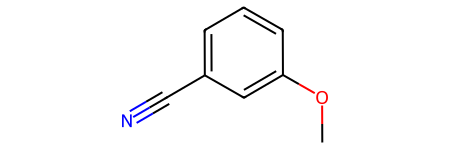

In [10]:
'''
graph LR
    A[SMILES] --> B(Encoder);
    B --> C[Latent Space];
    C --> D(Decoder);
    D --> E[SMILES];
    B --> F{VAE jointly trained on properties};
    D --> F;
    F --> C;

+--------+   -->   +---------+ ---->   +-------------------------------------+
| SMILES | ---->   | Encoder | ---->   | VAE (Jointly Trained on Properties) |
+--------+         +---------+         +-------------------------------------+

            --->  +-------------+ --->  +---------+   --->  +---------------+
            --->  | Latent Space| --->  | Decoder |   --->  | SMILES (Output)|
                  +-------------+       +---------+         +---------------+

Smiles representation
We traverse themolecular graph in DFS manner with smallest labels at each point
'''
Chem.MolFromSmiles('COc(c1)cccc1C#N')

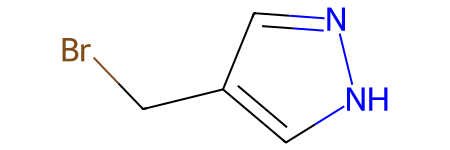

In [12]:
''' Representations Learning
Molecule in graph representation -> SMILES        SMILES Input
                                                        |
One hot encoding              - vectors input     Encoder NN (RNN)
    Br C c 1 c [ n H ] n c 1                            |
Br  1. 0 0 0 0 0 0 0 0 0 0 0                      Latent Space
C   0. 1 0 0 0 0 0 0 0 0 0 0                      - Continuous molecu;ar --> y
H   0. 0 0 0 0 0 0 1 0 0 0 0                      representation          prop.
c   0. 0 1 0 1 0 0 0 0 0 1 0                            |                 pred
n   ....      ....      ....                      Decoder NN
Seq2Seq model with RNN to encode SMILES                 |
VAE generates the new SMILES                      SMILES Output
property prediction network added                       |
'''
Chem.MolFromSmiles('BrCc1c[nH]nc1')